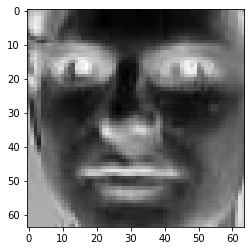

In [63]:
#a) Download the dataset “Face” from this link:  https://drive.google.com/drive/folders/14Mi1I91iVQ13PG0SPjh9wN5NSNlBb3rb?usp=sharing (Links to an external site.)

#Check out the dataset. This is an image dataset from AT&T research lab. 
#It includes 400 faces (64x64 pixels) from 40 people (10 images per person).

#You have to also download the csv file that includes the labels of the images (the label is person’s ID. 
#The file is in the same folder). The goal is to build a Face Recognition algorithm to recognize each person using PCA dim-reduction and a non-linear SVM.
#you can use:

#mpimg.imread(file_name)   to load an image, and

#plt.imshow(image_name, cmap=plt.cm.gray)  to show an image (This is a little different from what we had before!). 
#Add   %matplotlib inline   at top of your code to make sure that the images will be shown inside the Jupyter explorer page.




from  keras.wrappers.scikit_learn  import  KerasClassifier
from  sklearn.model_selection  import  GridSearchCV
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

img = ['none'] * 400

df = pd.read_csv ("C:\\Users\\dangl\\Downloads\\Face\\Face\\label.csv")

for n in range(400):
    file_name = "C:\\Users\\dangl\\Downloads\\Face\\Face\\" + str(n) + ".jpg"
    img[n] = mpimg.imread(file_name) 
    plt.imshow(img[n], cmap=plt.cm.gray_r, interpolation='nearest')
    




In [64]:
#b) Build the feature matrix and label vector: Each image is considered as a data sample with pixels as features. 
#Thus, to build the feature table you have to convert each 64x64 image into a row of the feature matrix with 4096 columns 
#(i.e 4096 features for 4096 pixels).

list_rows = []

feature_cols = [];

#we are going to 4096 features because 64x64 = 4096 (for each pixels)
for n in range(4096):
    feature_cols.append(n)

#we made a list that will contain 400 arrays each array with hold 4096 features
for n in range(400):
    list_rows.append(img[n].reshape(4096))

#creating our own DataFrame
facial_recognition_df = pd.DataFrame(list_rows, columns = feature_cols)

labels_face = df['Label']

#here we insert the label from df DataFrame in previous cell
facial_recognition_df.insert(4096, 'face_labels', labels_face)

display(facial_recognition_df)

X= facial_recognition_df[feature_cols]
y = facial_recognition_df['face_labels']

    

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,face_labels
0,186,183,179,190,212,219,221,232,230,231,...,45,47,18,0,8,15,9,3,5,13
1,204,198,194,195,198,195,190,186,190,193,...,0,29,52,90,146,130,120,164,167,30
2,86,79,82,95,100,102,121,146,169,179,...,167,179,169,192,188,197,189,185,141,34
3,61,90,98,119,144,156,174,177,183,195,...,244,246,168,126,187,162,145,58,18,19
4,99,134,165,183,201,210,215,224,232,236,...,90,94,90,70,41,71,103,92,117,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,19,13,7,7,14,18,15,10,33,38,...,204,166,68,147,184,188,163,156,143,32
396,109,145,182,196,195,192,189,184,165,167,...,122,69,44,40,49,46,40,43,44,19
397,163,177,193,202,211,221,227,229,235,238,...,10,25,34,43,47,45,44,48,53,11
398,145,147,151,160,178,196,203,202,201,200,...,162,165,152,150,150,124,132,114,117,4


In [65]:
#c) Normalize each column of your feature matrix using preprocessing.scale (This step is very important!).

from sklearn import preprocessing
X_normalized = preprocessing.scale(X);

display(X_normalized);

array([[ 1.37649641,  1.11885303,  0.79610373, ..., -1.17094622,
        -1.24726506, -1.21711982],
       [ 1.68113398,  1.3654141 ,  1.03570156, ...,  0.68710075,
         1.48558299,  1.58234648],
       [-0.31593455, -0.59063704, -0.75329558, ...,  1.84210291,
         1.84204144,  1.13304942],
       ...,
       [ 0.98723729,  1.02022861,  1.01972837, ..., -0.58507555,
        -0.48342554, -0.38764832],
       [ 0.68259971,  0.52710647,  0.34885444, ...,  0.88797069,
         0.63687242,  0.71831368],
       [-0.231313  , -0.67282406, -1.0088666 , ..., -0.06616154,
        -0.55132239, -0.50861291]])

In [66]:
#d) Use sklearn functions to split the normalized dataset into testing and training sets with the following parameters: test_size=0.25, random_state=5.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size = 0.25, random_state = 5)


In [67]:
#e) The dimensionality of the data samples is 4096. Use PCA (Principal Component Analysis) to reduce the dimensionality from 4096 to 50 (i.e. only k=50 principal components!). 
#You should “fit” your PCA on your training set only, and then use this fitted model to “transform” both training and testing sets.
#(When you finish this step, the number of columns in your testing and training sets should be 50). 
#You can use this format:

#from  sklearn.decomposition  import  PCA

#k = 50  #  k  is the number of components (new features) after dimensionality reduction

#my_pca = PCA(n_components = k)

# X_Train is feature matrix of training set before dimensionality reduction, 

# X_Train_New is feature matrix of training set after dimensionality reduction:

#X_Train_new = my_pca. fit_transform(X_Train)

#X_Test_new = my_pca. transform(X_Test)

from  sklearn.decomposition  import  PCA
k=50
my_pca = PCA(n_components = k)

X_train_new = my_pca.fit_transform(X_train)
X_test_new = my_pca.transform(X_test)


In [74]:
#f) Design and Train a non-linear SVM classifier with “RBF Kernel” to recognize the face based on the training dataset that you built. Use SVC(C=1, kernel='rbf', gamma=0.0005, random_state=1). 
#Then, Test your SVM on testing set, and calculate and report the accuracy. Also, calculate and report the Confusion Matrix using confusion_matrix(y_test, y_predict).

from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

my_SVC = SVC(C=1, kernel='rbf', gamma=0.0005, random_state=1)

my_SVC.fit(X_train_new, y_train)

y_predict_SVC = my_SVC.predict(X_test_new)
print('Predictions for SVC: ')
print(y_predict_SVC)

score_SVC = accuracy_score(y_test, y_predict_SVC)
print('Accuracy score for SVC:')
print(score_SVC)

from sklearn import metrics

cm_SVC = metrics.confusion_matrix(y_test, y_predict_SVC)

print("Confusion matrix:")
print(cm_SVC)


Predictions for SVC: 
[16 32 39 22 29 38 21 12 23 28  9 13 29 21 10  1 36 11 39 25  8 26 19 12
 35  7 21 20  8 14  7 33 23  0 20  1 38 25  8 23 39  2 10 13 38 25 26 18
  4 36 26 17 13 16 38 36  4 36  5  6 14  9 13  7  9 22  6  6 24  0  4 31
 31 37 14 22 16 34 11 15 15  0  2 25  5 34 11 18 22 11 12  1 16 24 36 33
 32 13 38 20]
Accuracy score for SVC:
0.91
Confusion matrix:
[[3 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 4 0]
 [0 0 0 ... 0 0 1]]


In [83]:
#g) Now, use GridSearchCV to find the best value for parameter C in your SVM. Search in this list: [0.1, 1, 10, 100, 1e3, 5e3, 1e4, 5e4, 1e5].
X_normalized_pca = my_pca.fit_transform(X_normalized)

from sklearn.model_selection import GridSearchCV


# create a dictionary for grid parameter:

param_grid = dict('1': list(range(0.1, 1), '2': list(range(1, 10) ))
print(param_grid,'\n')

# creat the grid, and define the metric for evaluating the model: 
grid = GridSearchCV(X_normalized_pca, param_grid, cv=10, scoring='accuracy')

# fit the grid (start the grid search):
grid.fit(X, y)

# view the results:
#print(grid.cv_results_)

# view the best results corresponding to the best structure of ANN:
print(grid.best_score_)
print(grid.best_params_)

SyntaxError: invalid syntax (<ipython-input-83-49128ce202a1>, line 9)